#### Очистка данных

In [1]:
import pandas as pd
import numpy as np

courses = pd.read_csv("courses.csv")
from constants import clean_duration, string_to_list

In [2]:
courses.rename(columns={'software': 'skills'}, inplace=True)

In [3]:
courses.head()

,course_name,category,skills,certificate,teacher,course_level,course_rating,hours_per_week,course_link,price
0,Основы компьютерного зрения: мир глазами машины,Машинное обучение и наука о данных,"Python, PyTorch, Python, PyTorch",No,"Елена Кантонистова, Марк Блуменау",Начальный уровень,5.0,NaN,https://stepik.org/course/231644?search=713949...,0
1,Анализ Данных с Глебом Михайловым (3 курса сра...,Машинное обучение и наука о данных,"Python, Pandas, Python",No,Глеб Михайлов,Начальный уровень,5.0,NaN,https://stepik.org/course/200649?search=713949...,648050
2,Нейронные сети: Основы глубокого обучения с нуля,Машинное обучение и наука о данных,NaN,Сертификат Stepik,Валерий Никаноров,Начальный уровень,5.0,NaN,https://stepik.org/course/225292?search=713949...,990
3,Машинное Обучение в Python: Большой Курс для Н...,Машинное обучение и наука о данных,"Python, Pandas, NumPy, Matplotlib, Jupyter Not...",Сертификат Stepik,Влад Бурмистров,Начальный уровень,5.0,NaN,https://stepik.org/course/129449?search=713949...,2465
4,Машинное обучение: Кросс-валидация и оптимизац...,Машинное обучение и наука о данных,NaN,Сертификат Stepik,Сергей Спирёв,NaN,5.0,NaN,https://stepik.org/course/214012?search=713949...,780


In [4]:
courses.hours_per_week.unique()

array([nan, '1-2', '10', '4-5 часов в неделю', '2-3 часа в неделю',
       '71 час видео-лекций + время на выполнение практических заданий',
       '4', '4 - 8 часов в неделю', '4-5', '15 минут в день',
       '10 часов в неделю', '3-6 часов в неделю', '5 часов в неделю',
       '5-6 часов в неделю', '1.5-2 часа в неделю', '4-6 часов в неделю',
       '2', '1 час в день или больше', '8', '6-8', '0.5',
       '30 минут в день', '8 часов в неделю', '3-5 часов',
       '10 часов в неделю в течение 1 — 1.5 месяца', '10-20 часов',
       'В среднем - 2 месяца', '6 подробных видео-уроков',
       '30-60 минут в день', '4 часа в неделю', '6-8 часов в неделю',
       '1 - 2 часа в неделю', '4-6 часа в неделю', '1-2 часа в неделю',
       '3 - 4 часа в неделю', '5',
       '4-5 часов в неделю в течение 2.5 месяцев', '5-6', '4-8',
       '20 часов в неделю', 'от 5-7 часов в неделю',
       'от 5 часов в неделю', 'не менее 1 часа в день', '2 часа в неделю',
       '11-13 часов в неделю', '3 - 4 ч

In [5]:
courses.shape

(648, 10)

In [6]:
courses['hpw'] = courses['hours_per_week'].apply(clean_duration)

In [7]:
courses.hpw.unique()

array([   nan,  10.  ,   4.5 ,   2.5 ,  11.83,   4.  ,   6.  ,   1.75,
         5.  ,   5.5 ,   2.  ,   7.  ,   8.  ,   0.5 ,   3.5 ,   1.25,
        20.  ,   1.5 ,   1.  ,  12.  ,   3.  ,  64.  ,   0.33,   0.67,
         9.  ,  36.  ,   0.  ,   6.5 ,   2.33,  16.  , 108.  ,   0.58,
         5.25,   4.67,  35.  ,  40.  ,   1.17,   3.67,  72.  ])

In [8]:
courses.describe()

,course_rating,price,hpw
count,569.000000,648.000000,392.000000
mean,4.873462,13314.084877,6.216990
std,0.277213,76755.137540,10.492015
min,1.700000,0.000000,0.000000
25%,4.800000,499.750000,3.000000
50%,5.000000,1900.000000,4.500000
75%,5.000000,3900.000000,5.000000
max,5.000000,899250.000000,108.000000


In [9]:
courses.fillna(courses['hpw'].median(), inplace=True)
courses.drop(columns=['hours_per_week'], inplace=True)

In [10]:
courses['price'] = np.where(courses['price'] > 100000, courses['price'] / 100, courses['price'])

In [11]:
courses.course_level.unique()

array(['Начальный уровень', 4.5, 'Средний уровень', 'Продвинутый уровень'],
      dtype=object)

In [12]:
courses['course_level'] = np.where(courses['course_level'] == 4.5, 'Средний уровень', courses['course_level'])

In [13]:
courses['category'] = np.where(courses['category'] == 'Category 357', 'DevOps и системное администрирование', courses['category'])

In [14]:
convert = ['skills', 'teacher']
for col in convert:
    courses[col] = courses[col].apply(string_to_list)

In [15]:
courses.sample(5)

,course_name,category,skills,certificate,teacher,course_level,course_rating,course_link,price,hpw
260,Инструменты дизайнера Photoshop и Illustrator....,Adobe Illustrator,[],No,[Дмитрий Фокеев],Начальный уровень,5.0,https://stepik.org/course/126396?search=713973...,3690.0,4.5
138,Продвинутый SQL,Аналитика и работа с данными,[SQL],Сертификат Stepik,[Shultais Education],Средний уровень,4.8,https://stepik.org/course/55776?search=7139621029,2920.0,4.0
377,2D графика и анимация на PascalABC.NET школьни...,Анимация и моушн-дизайн,[],Сертификат Stepik,[No instructor found],Средний уровень,4.9,https://stepik.org/course/121483?search=713982...,1990.0,4.5
467,Français général,Французский язык,[],No,"[Лариса Бабушкина, Зайцев Алексей Анатольевич]",Средний уровень,5.0,https://stepik.org/course/105540?search=714144...,0.0,108.0
526,ЕГЭ по математике 2025: первая часть,Маркетинг и продажи,[вычисления],Сертификат Stepik,[Тимур 🐍 Гуев],Начальный уровень,5.0,https://stepik.org/course/9737?search=7141462966,1590.0,6.0


In [16]:
courses.iloc[373]

course_name                        Качественный контент на YouTube
category                                   Анимация и моушн-дизайн
skills                                                          []
certificate                                                     No
teacher                                            [Евгений Ашпин]
course_level                                       Средний уровень
course_rating                                                  4.5
course_link      https://stepik.org/course/100526?search=713982...
price                                                       1990.0
hpw                                                            4.5
Name: 373, dtype: object

array([[<Axes: title={'center': 'course_rating'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'hpw'}>, <Axes: >]], dtype=object)

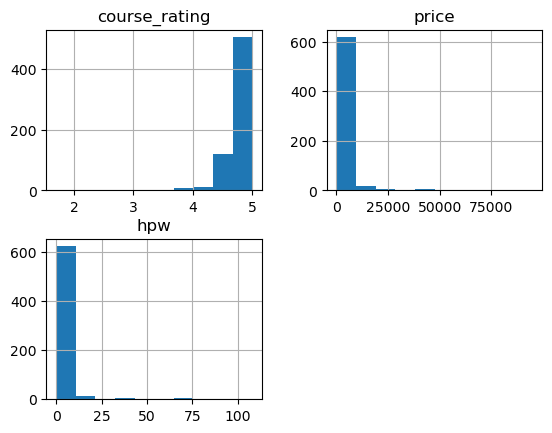

In [17]:
courses.hist()

In [18]:
teach = set()
for teachers in courses.skills:
    for teacher in teachers:
        teach.add(teacher)

print(teach)

{'Kali Linux', 'рисование', 'логика', 'Django', 'GitHub', 'Xcode', 'Matplotlib', 'Scikit-learn', 'TensorFlow', 'CorelDRAW', 'Bootstrap', 'TestNG', 'SQL', 'дизайн', 'Vue.js', 'Elementor', 'ДНК', 'C#', 'Python', 'R', 'Blender', 'Principle', 'Kubernetes', 'архитектура', 'PHP', 'Unity', 'эмоции', 'Webflow', 'Java', 'музыка', 'реакции', 'React', 'сердечно-легочная реанимация', 'статистика', 'психология', 'Go', 'Vagrant', 'Unreal Engine', 'история', 'GitLab', 'Godot', 'психотерапия', 'генетика', 'навигация', 'HTML', 'Marvel', 'Swift', 'Zeplin', 'Sass', 'рынок', 'Figma', 'Maya', 'Agile', 'Selenium', 'Puppet', 'фитнес', 'Apache', 'ZBrush', 'стиль', 'Генетика', 'Inkscape', 'Pandas', 'IntelliJ IDEA', 'Metasploit', 'профилактика', 'PyCharm', 'Zabbix', 'NumPy', 'TypeScript', 'Jira', 'оказание помощи', 'SketchUp', 'импровизация', 'PyTorch', 'Ansible', 'поведение', 'здоровье', 'путешествия', 'Cucumber', 'Jupyter Notebook', 'Postman', 'аптечка', 'инженерия', 'Adobe Illustrator', 'тренировки', 'Cinema

In [19]:
courses.certificate.unique()

array(['No', 'Сертификат Stepik'], dtype=object)

In [20]:
courses.sample(10)

,course_name,category,skills,certificate,teacher,course_level,course_rating,course_link,price,hpw
375,Быстрый старт в видеомонтаж и создание графики...,Анимация и моушн-дизайн,[],No,[Дмитрий Фокеев],Начальный уровень,5.0,https://stepik.org/course/206100?search=713982...,3390.0,4.5
267,Мини-курс по Adobe Illustrator,Adobe Illustrator,[Adobe Illustrator],No,[Творческая лаборатория «ЗДЕСЬ»],Начальный уровень,4.7,https://stepik.org/course/179374?search=713973...,0.0,5.0
253,Jenkins в работе,DevOps и системное администрирование,"[Git, JUnit, Jenkins]",Сертификат Stepik,[Evgeniy Lestopadov],Начальный уровень,4.9,https://stepik.org/course/113793?search=713972...,1800.0,20.0
350,Полный курс по UI/UX дизайну мобильных приложе...,Web-дизайн,[Figma],Сертификат Stepik,[Алексей Поляков],Начальный уровень,5.0,https://stepik.org/course/232766?search=713980...,2690.0,4.5
468,Времена глаголов во французском языке,Французский язык,[],No,[Елена Емелина],Средний уровень,5.0,https://stepik.org/course/181601?search=714144...,500.0,5.0
111,ProgMine. Большой курс по программированию на ...,Разработка игр,[],Сертификат Stepik,[Александр Бобуров],Начальный уровень,5.0,https://stepik.org/course/123284?search=713960...,2000.0,2.0
437,Китайский за 3 месяца - легко!,Китайский язык,[],Сертификат Stepik,[Павлова Ольга],Средний уровень,5.0,https://stepik.org/course/91056?search=7141433587,4500.0,4.5
359,Javascript. Часть 1 (Переменные и условные опе...,Web-дизайн,[JavaScript],Сертификат Stepik,[Hayk Inants],Начальный уровень,4.8,https://stepik.org/course/198613?search=713980...,855.0,4.0
223,2 часть. Безопасность в интернете: защита комп...,Информационная безопасность,[],No,[Лия Шатуш],Начальный уровень,5.0,https://stepik.org/course/212046?search=713971...,2990.0,4.5
453,"Курс по страноведению Германии: ""Deutschland -...",Немецкий язык,[],No,"[Анастасия Бояркина, Елизавета Гериева]",Средний уровень,5.0,https://stepik.org/course/221217?search=714143...,0.0,4.5


In [21]:
duplicated_course_names = courses['course_name'][courses.duplicated(subset=['course_name'], keep=False)].unique()
print(duplicated_course_names)

['Основы компьютерного зрения: мир глазами машины'
 'Анализ Данных с Глебом Михайловым (3 курса сразу!)'
 'Машинное Обучение в Python: Большой Курс для Начинающих'
 'Машинное обучение: Кросс-валидация и оптимизация гиперпараметров'
 'Делаем свой AI-продукт на базе ChatGPT или других LLM моделей.'
 'Введение в соревновательный Data Science'
 'Практический Machine Learning'
 'Пакет курсов: Pandas + Matplotlib + Seaborn'
 'Машинное обучение: Метрики качества классификации и регрессии'
 'Пакет курсов "Data Scientist": Python + SQL + Машинное обучение'
 'Data Science с Глебом Михайловым' 'Продвинутый SQL'
 'Объектно-ориентированное программирование на Java'
 'Python Advanced: от ООП до многопроцессности'
 'PRO Go. Алгоритмы и структуры данных' 'Jetpack Compose полный курс'
 'Полный курс Python для начинающих' 'WEB Парсинг на Python'
 '"Поколение Python": ООП' 'Асинхронный Python' 'Основы SQL'
 'SQL с нуля до PRO' 'PRO Go. Базовый курс по структурам данных'
 'Добрый, добрый Python ООП - обуч

In [22]:
courses['certificate_binary'] = courses['certificate'].apply(lambda x: 1 if x == 'Сертификат Stepik' else 0)
courses.drop(columns=['certificate'], inplace=True)

In [23]:
courses = courses.drop_duplicates(subset=['course_name'], keep='first').reset_index(drop=True)

In [24]:
courses.shape

(515, 10)

In [25]:
courses.head()

,course_name,category,skills,teacher,course_level,course_rating,course_link,price,hpw,certificate_binary
0,Основы компьютерного зрения: мир глазами машины,Машинное обучение и наука о данных,"[Python, PyTorch]","[Елена Кантонистова, Марк Блуменау]",Начальный уровень,5.0,https://stepik.org/course/231644?search=713949...,0.0,4.5,0
1,Анализ Данных с Глебом Михайловым (3 курса сра...,Машинное обучение и наука о данных,"[Python, Pandas]",[Глеб Михайлов],Начальный уровень,5.0,https://stepik.org/course/200649?search=713949...,6480.5,4.5,0
2,Нейронные сети: Основы глубокого обучения с нуля,Машинное обучение и наука о данных,[],[Валерий Никаноров],Начальный уровень,5.0,https://stepik.org/course/225292?search=713949...,990.0,4.5,1
3,Машинное Обучение в Python: Большой Курс для Н...,Машинное обучение и наука о данных,"[Python, Pandas, NumPy, Matplotlib, Jupyter No...",[Влад Бурмистров],Начальный уровень,5.0,https://stepik.org/course/129449?search=713949...,2465.0,4.5,1
4,Машинное обучение: Кросс-валидация и оптимизац...,Машинное обучение и наука о данных,[],[Сергей Спирёв],Средний уровень,5.0,https://stepik.org/course/214012?search=713949...,780.0,4.5,1


In [26]:
courses.columns

Index(['course_name', 'category', 'skills', 'teacher', 'course_level',
       'course_rating', 'course_link', 'price', 'hpw', 'certificate_binary'],
      dtype='object')

In [27]:
courses.to_csv("courses-cleaned.csv")